#### 생성모형 (가능도 예시)

In [7]:
rv_normal = sp.stats.norm(loc=37.5, scale=0.1)

In [8]:
rv_normal.pdf(38.34)

1.9010815379074236e-15

In [9]:
rv_flu = sp.stats.norm(loc=40, scale=0.2)

In [11]:
rv_flu.pdf(38.34)

2.1908197177549902e-15

#### 이차판별분석법

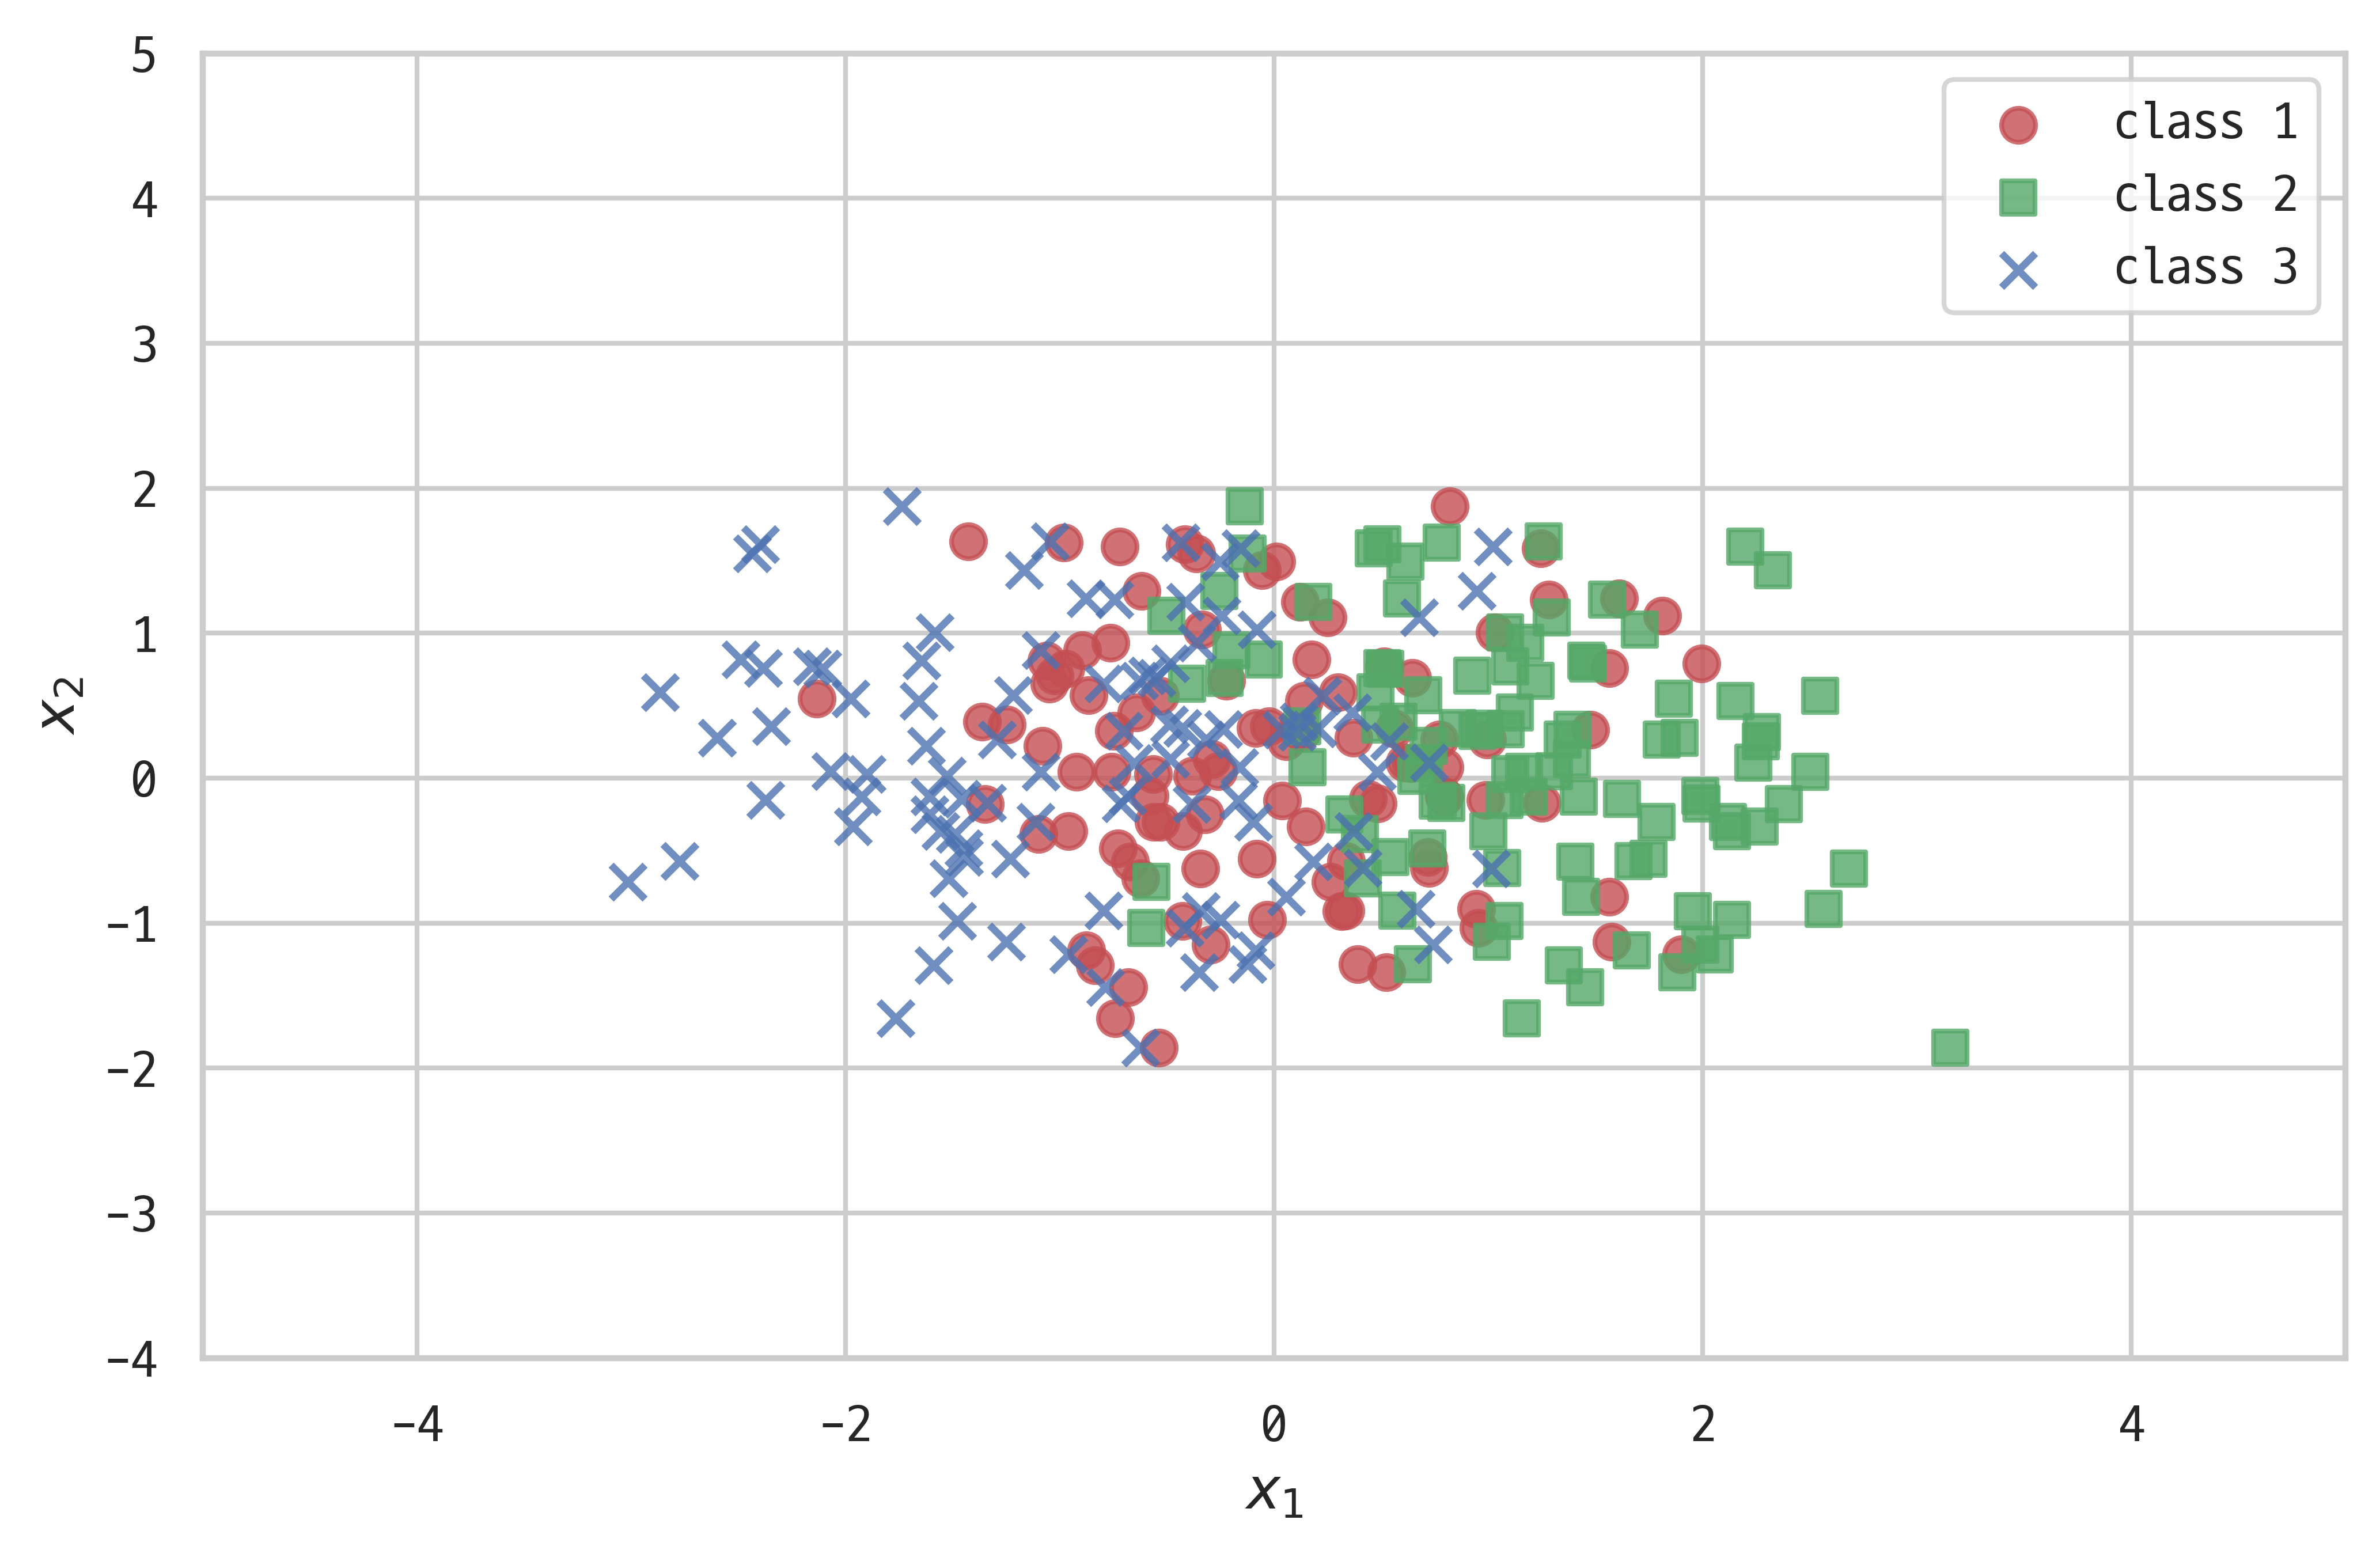

In [59]:
N = 100
rv1 = sp.stats.multivariate_normal([0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker='o', color='r', label='class 1')
plt.scatter(X2[:, 0], X1[:, 1], alpha=0.8, s=50, marker='s', color='g', label='class 2')
plt.scatter(X3[:, 0], X1[:, 1], alpha=0.8, s=50, marker='x', color='b', label='class 3')
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [18]:
X1.mean(axis=0)

array([-0.00080125,  0.1194572 ])

In [19]:
X2.mean(axis=0)

array([1.16303727, 1.03930605])

In [20]:
X3.mean(axis=0)

array([-0.8640604 ,  1.02295794])

In [21]:
np.cov(X1.T)

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [22]:
np.cov(X2.T)

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [23]:
np.cov(X3.T)

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [25]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [26]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [27]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [28]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [29]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

In [39]:
# 좌표가 (2, -1)이면서 각 클래스에 속할 확률
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))
rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

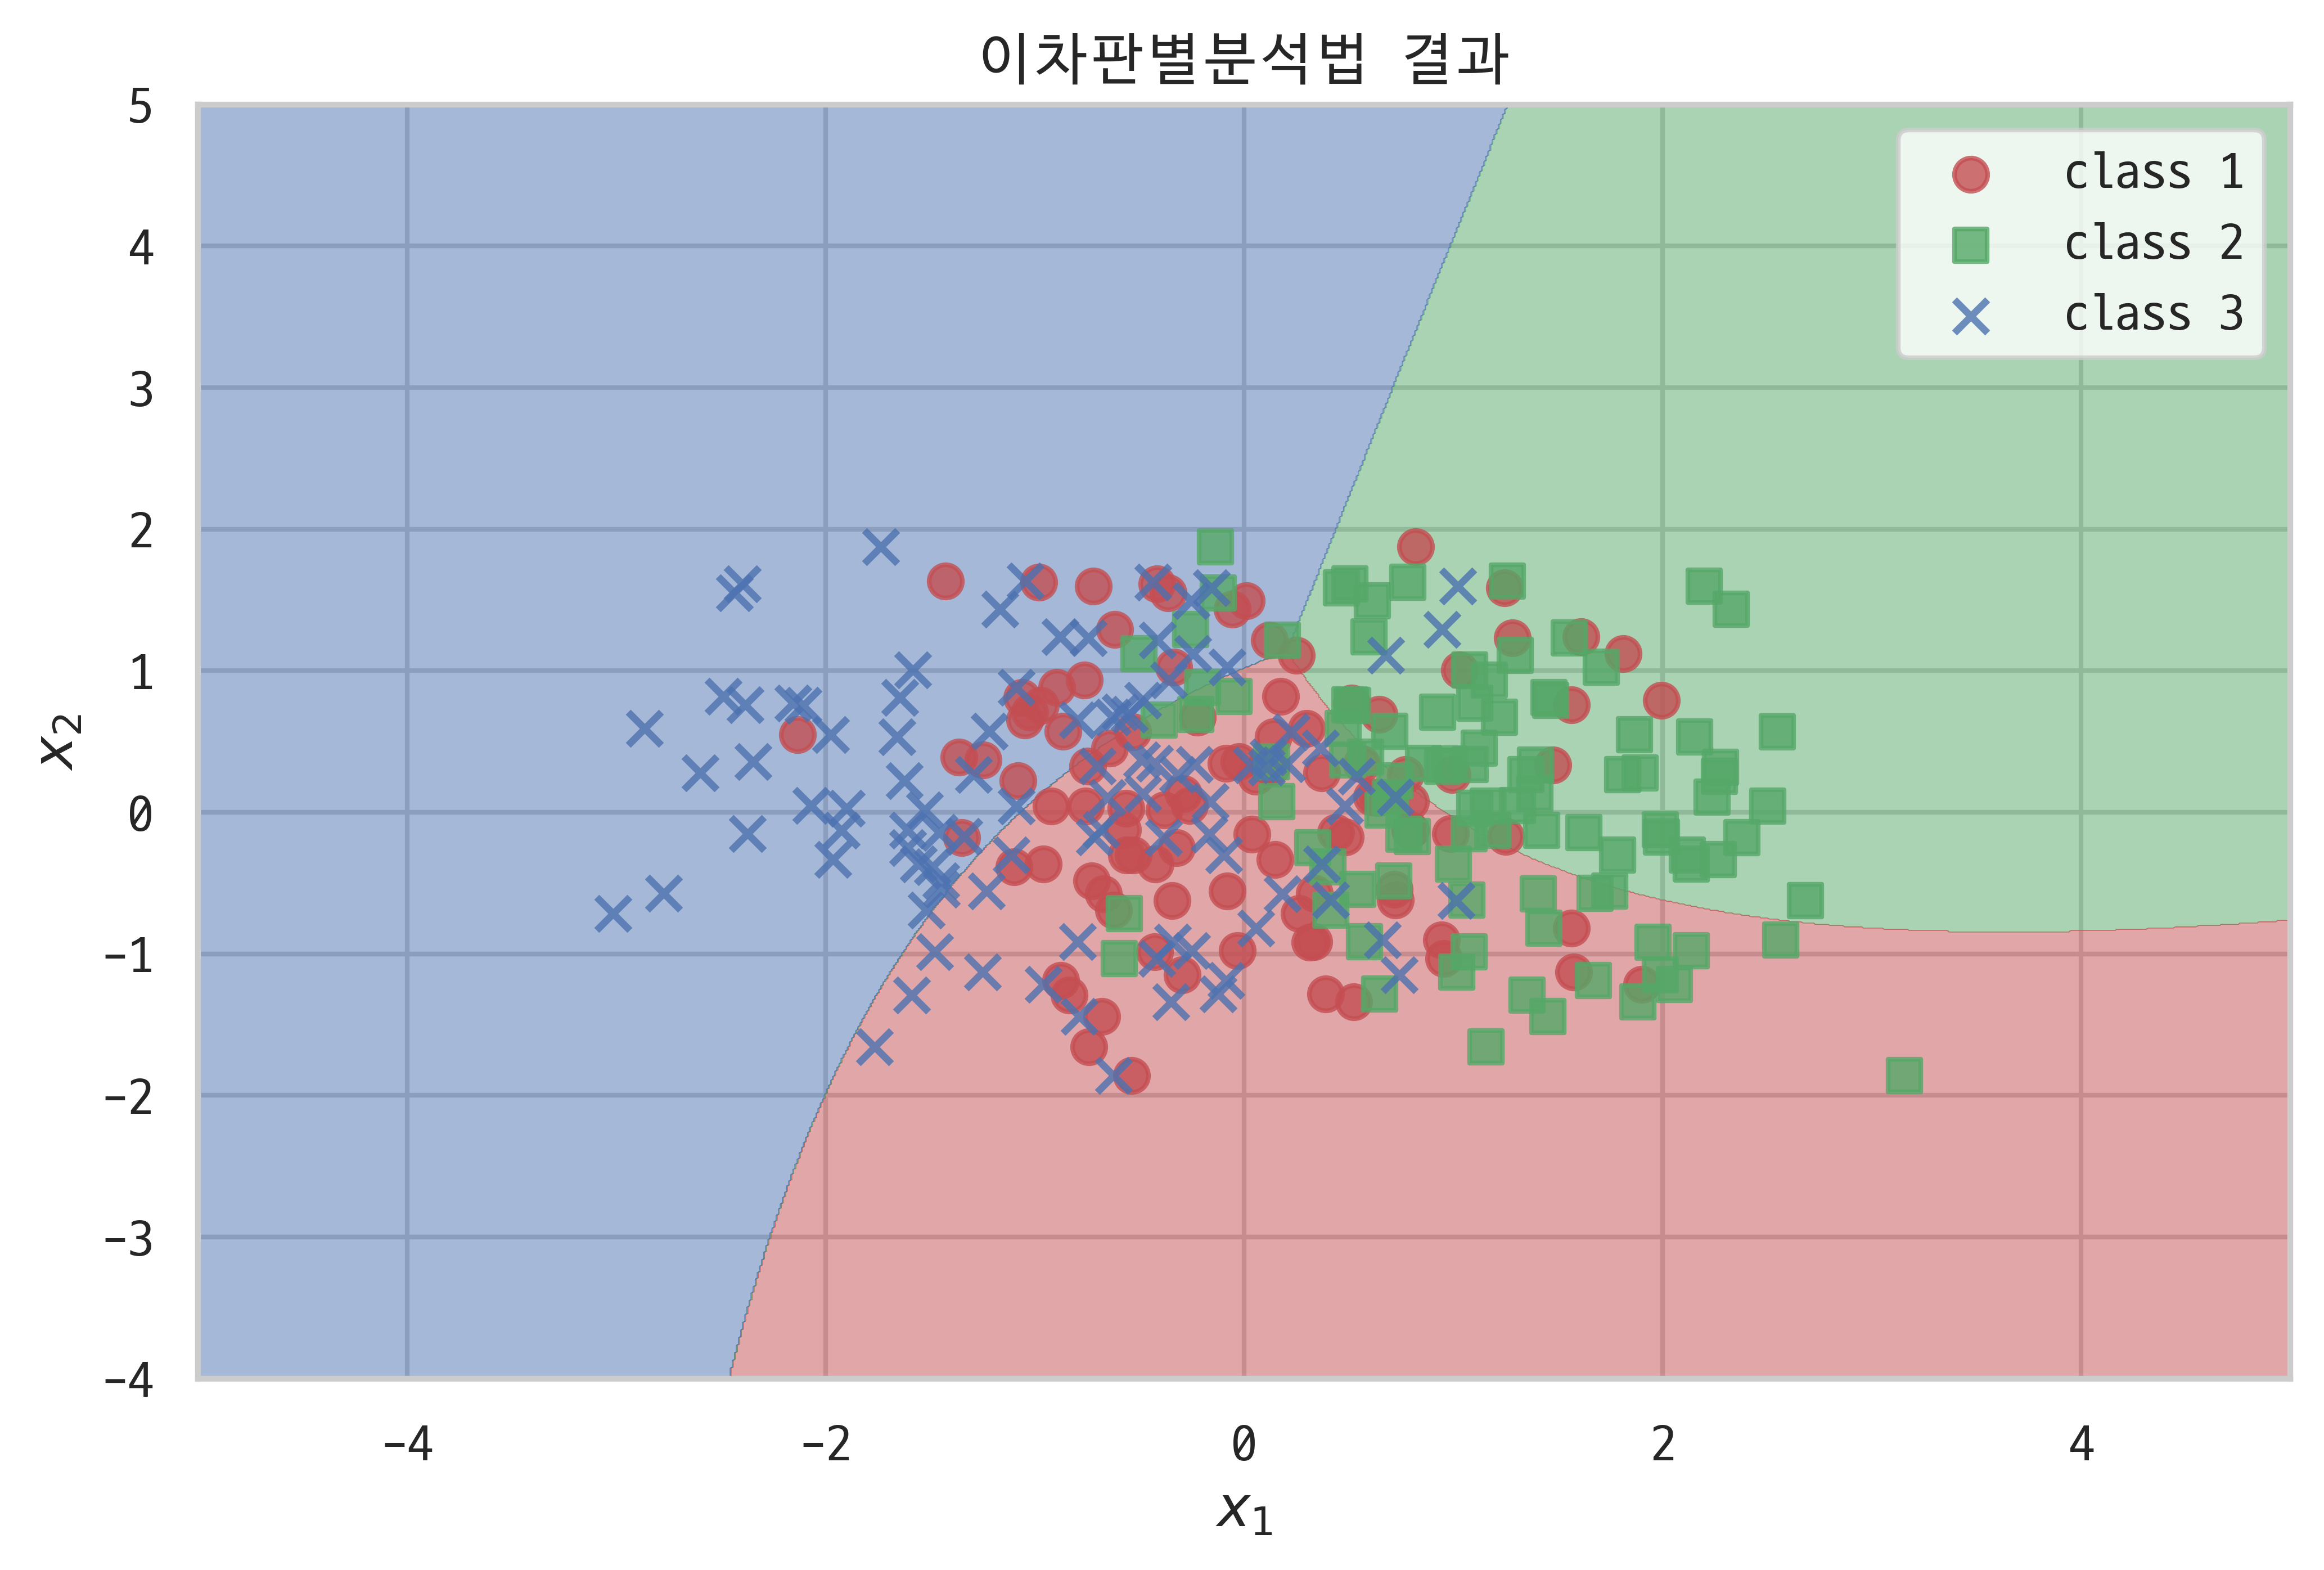

In [43]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000), 
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r', 'g', 'b']).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker='o', color='r', label='class 1')
plt.scatter(X2[:, 0], X1[:, 1], alpha=0.8, s=50, marker='s', color='g', label='class 2')
plt.scatter(X3[:, 0], X1[:, 1], alpha=0.8, s=50, marker='x', color='b', label='class 3')
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('이차판별분석법 결과')
plt.legend()
plt.show()

#### Ex. 13.1.1

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
X1= iris.data
y1 = iris.target
model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X1, y1)
y1_pred = model.predict(X1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



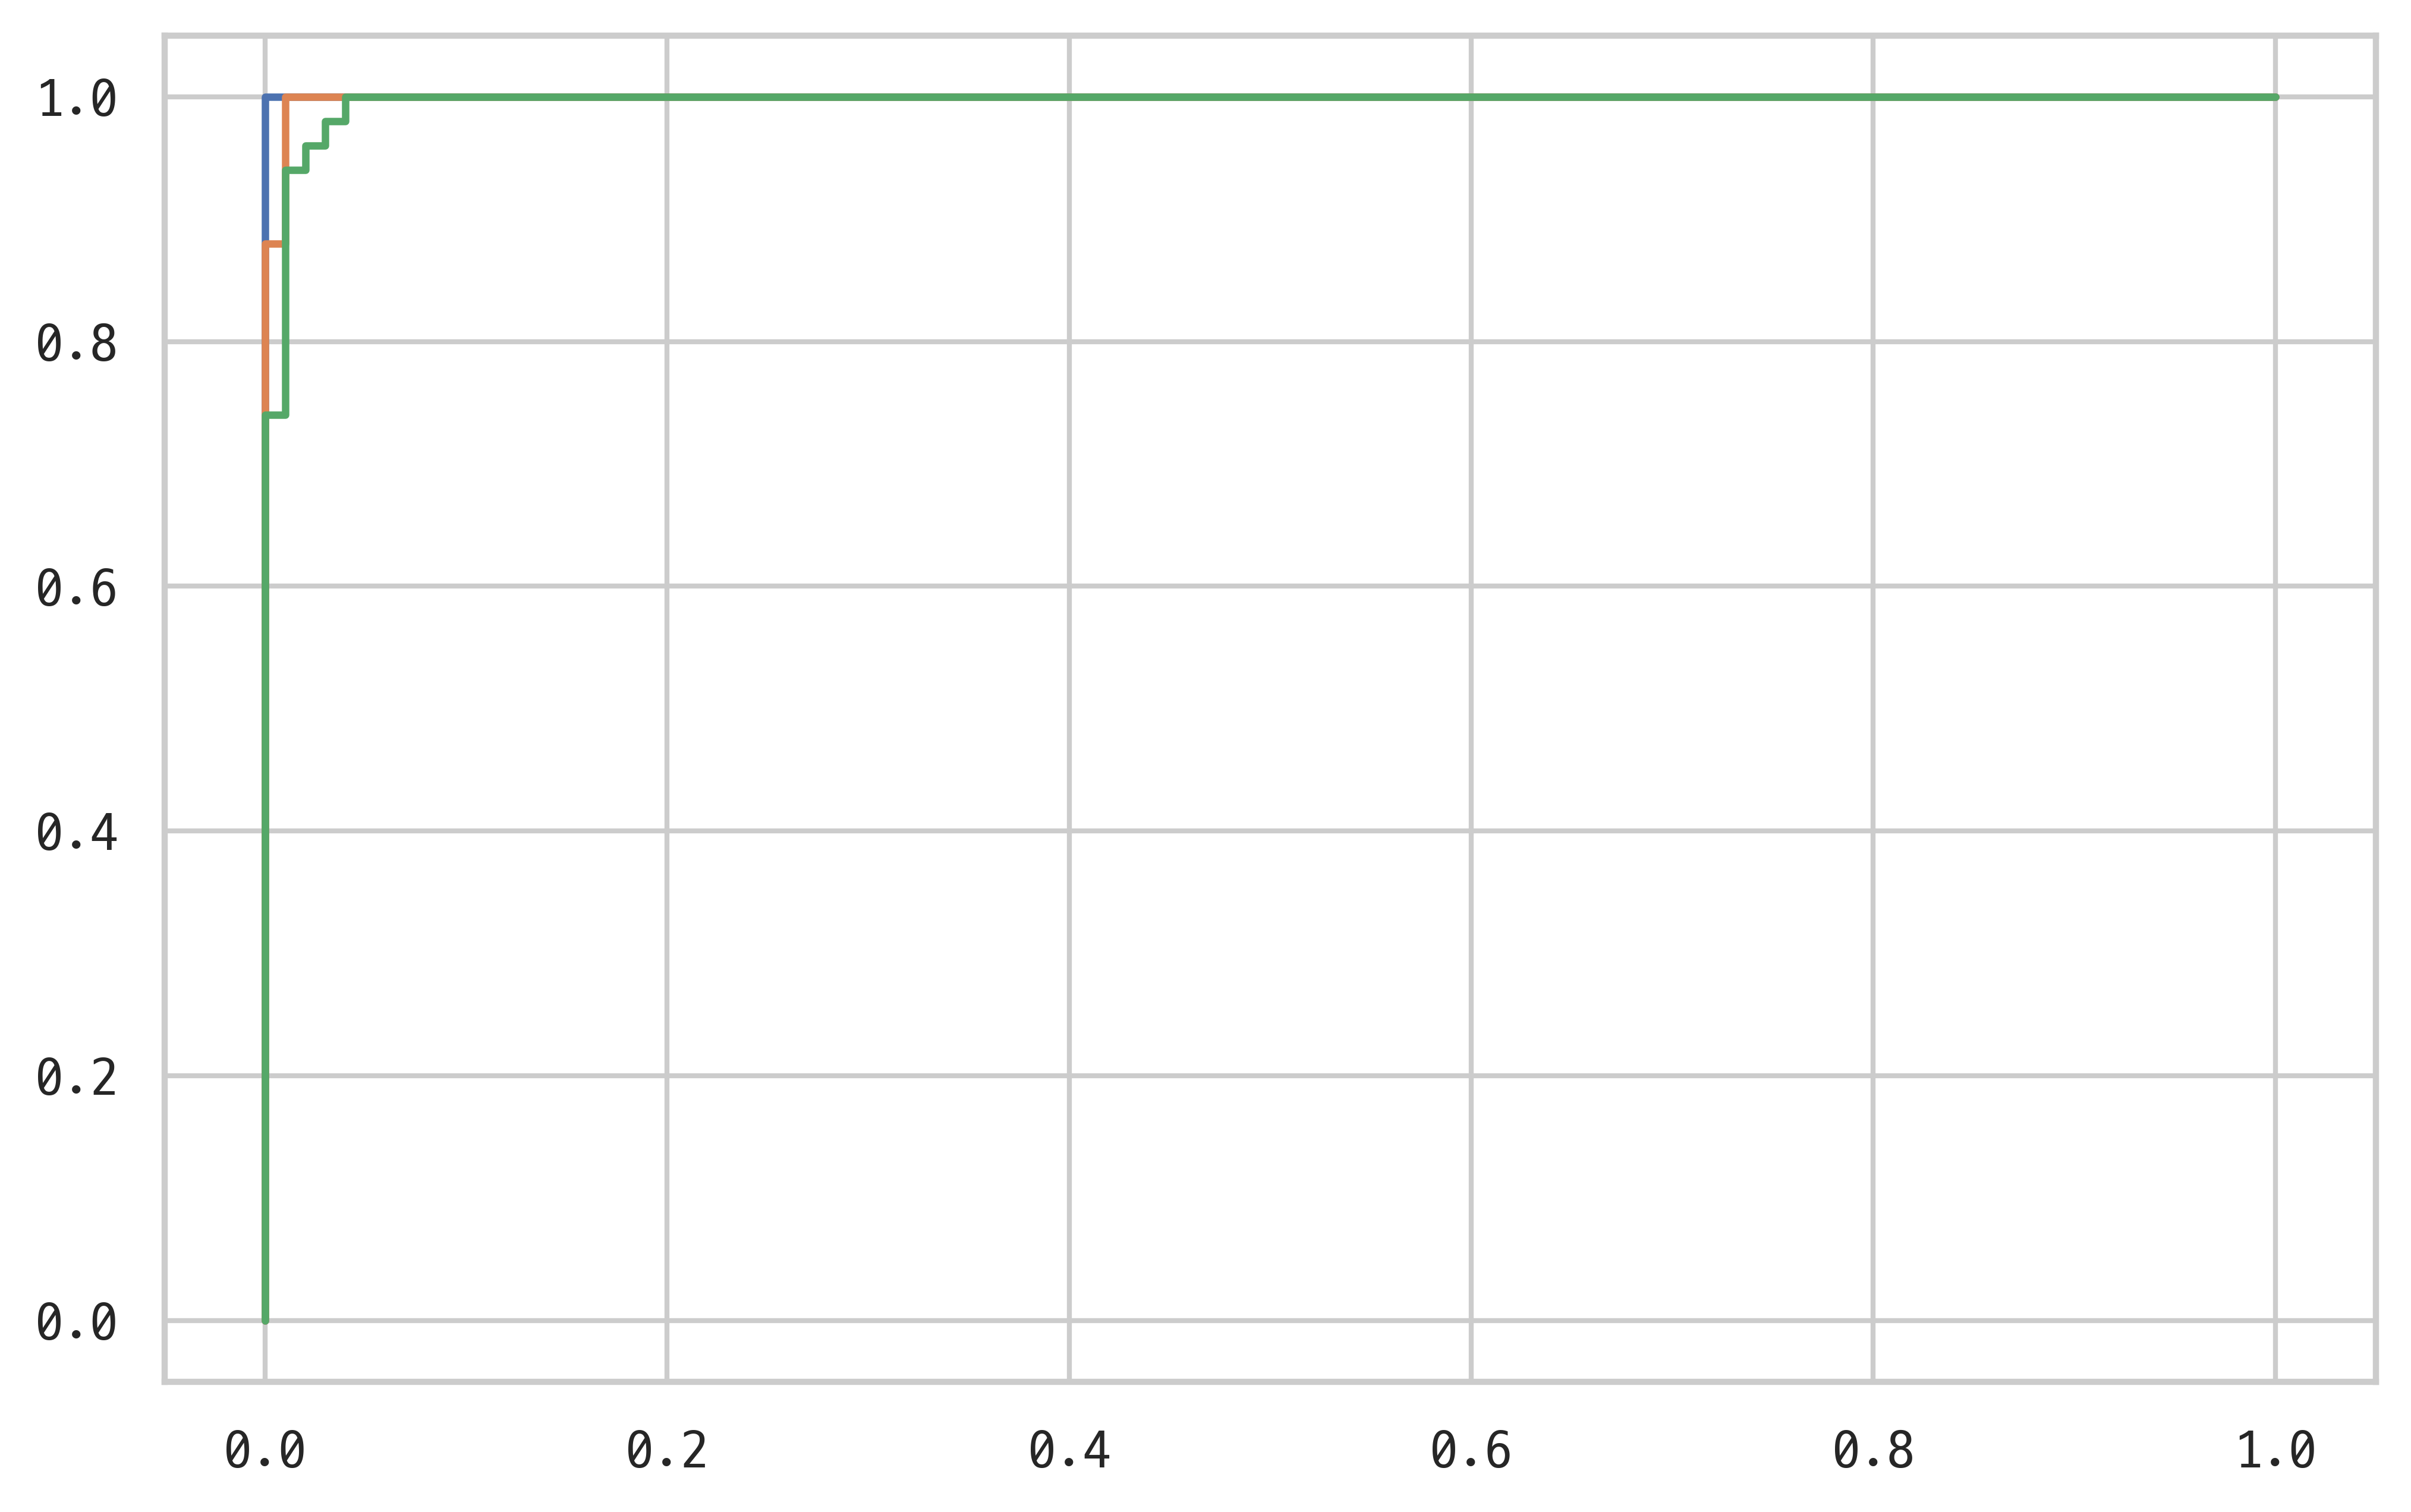

In [49]:
from sklearn.preprocessing import label_binarize
# label_binarize = one-hot encoding

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

#### 선형판별분석법

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X, y)

In [65]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [66]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

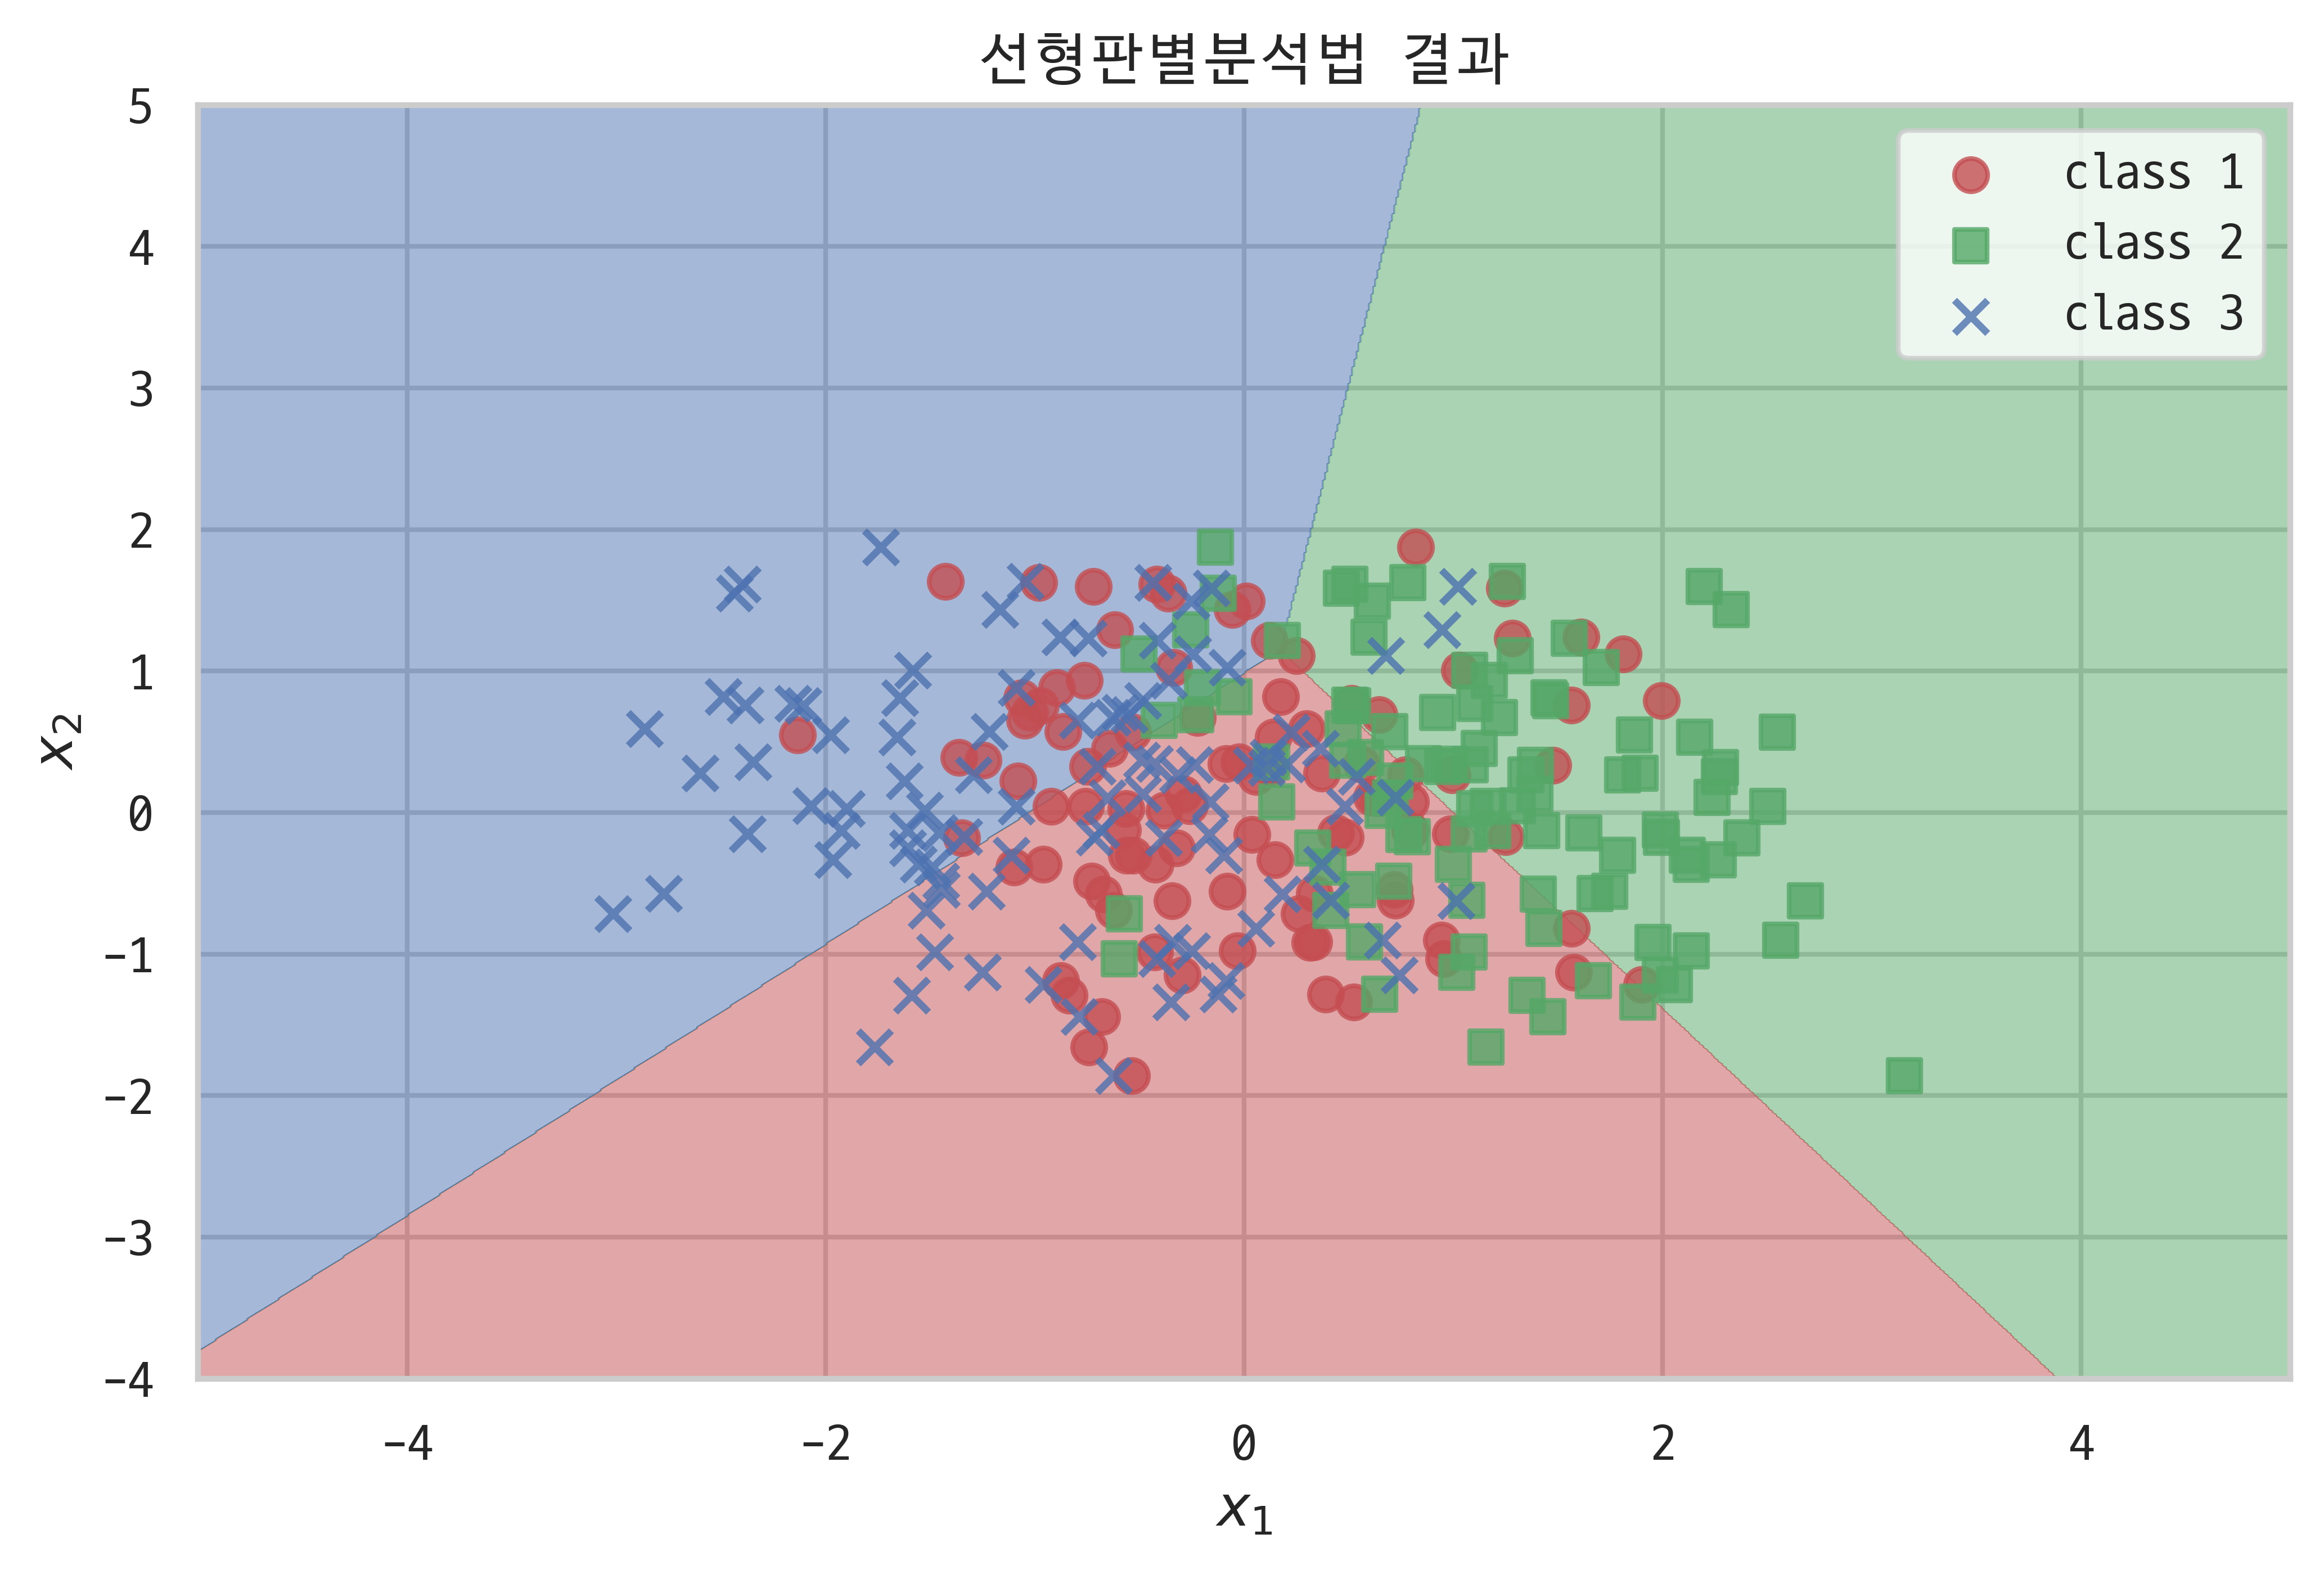

In [67]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000), 
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(['r', 'g', 'b']).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker='o', color='r', label='class 1')
plt.scatter(X2[:, 0], X1[:, 1], alpha=0.8, s=50, marker='s', color='g', label='class 2')
plt.scatter(X3[:, 0], X1[:, 1], alpha=0.8, s=50, marker='x', color='b', label='class 3')
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('선형판별분석법 결과')
plt.legend()
plt.show()

#### Ex. 13.1.2

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
X1= iris.data
y1 = iris.target
model = LinearDiscriminantAnalysis(solver='svd', store_covariance=True).fit(X1, y1)
y1_pred = model.predict(X1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



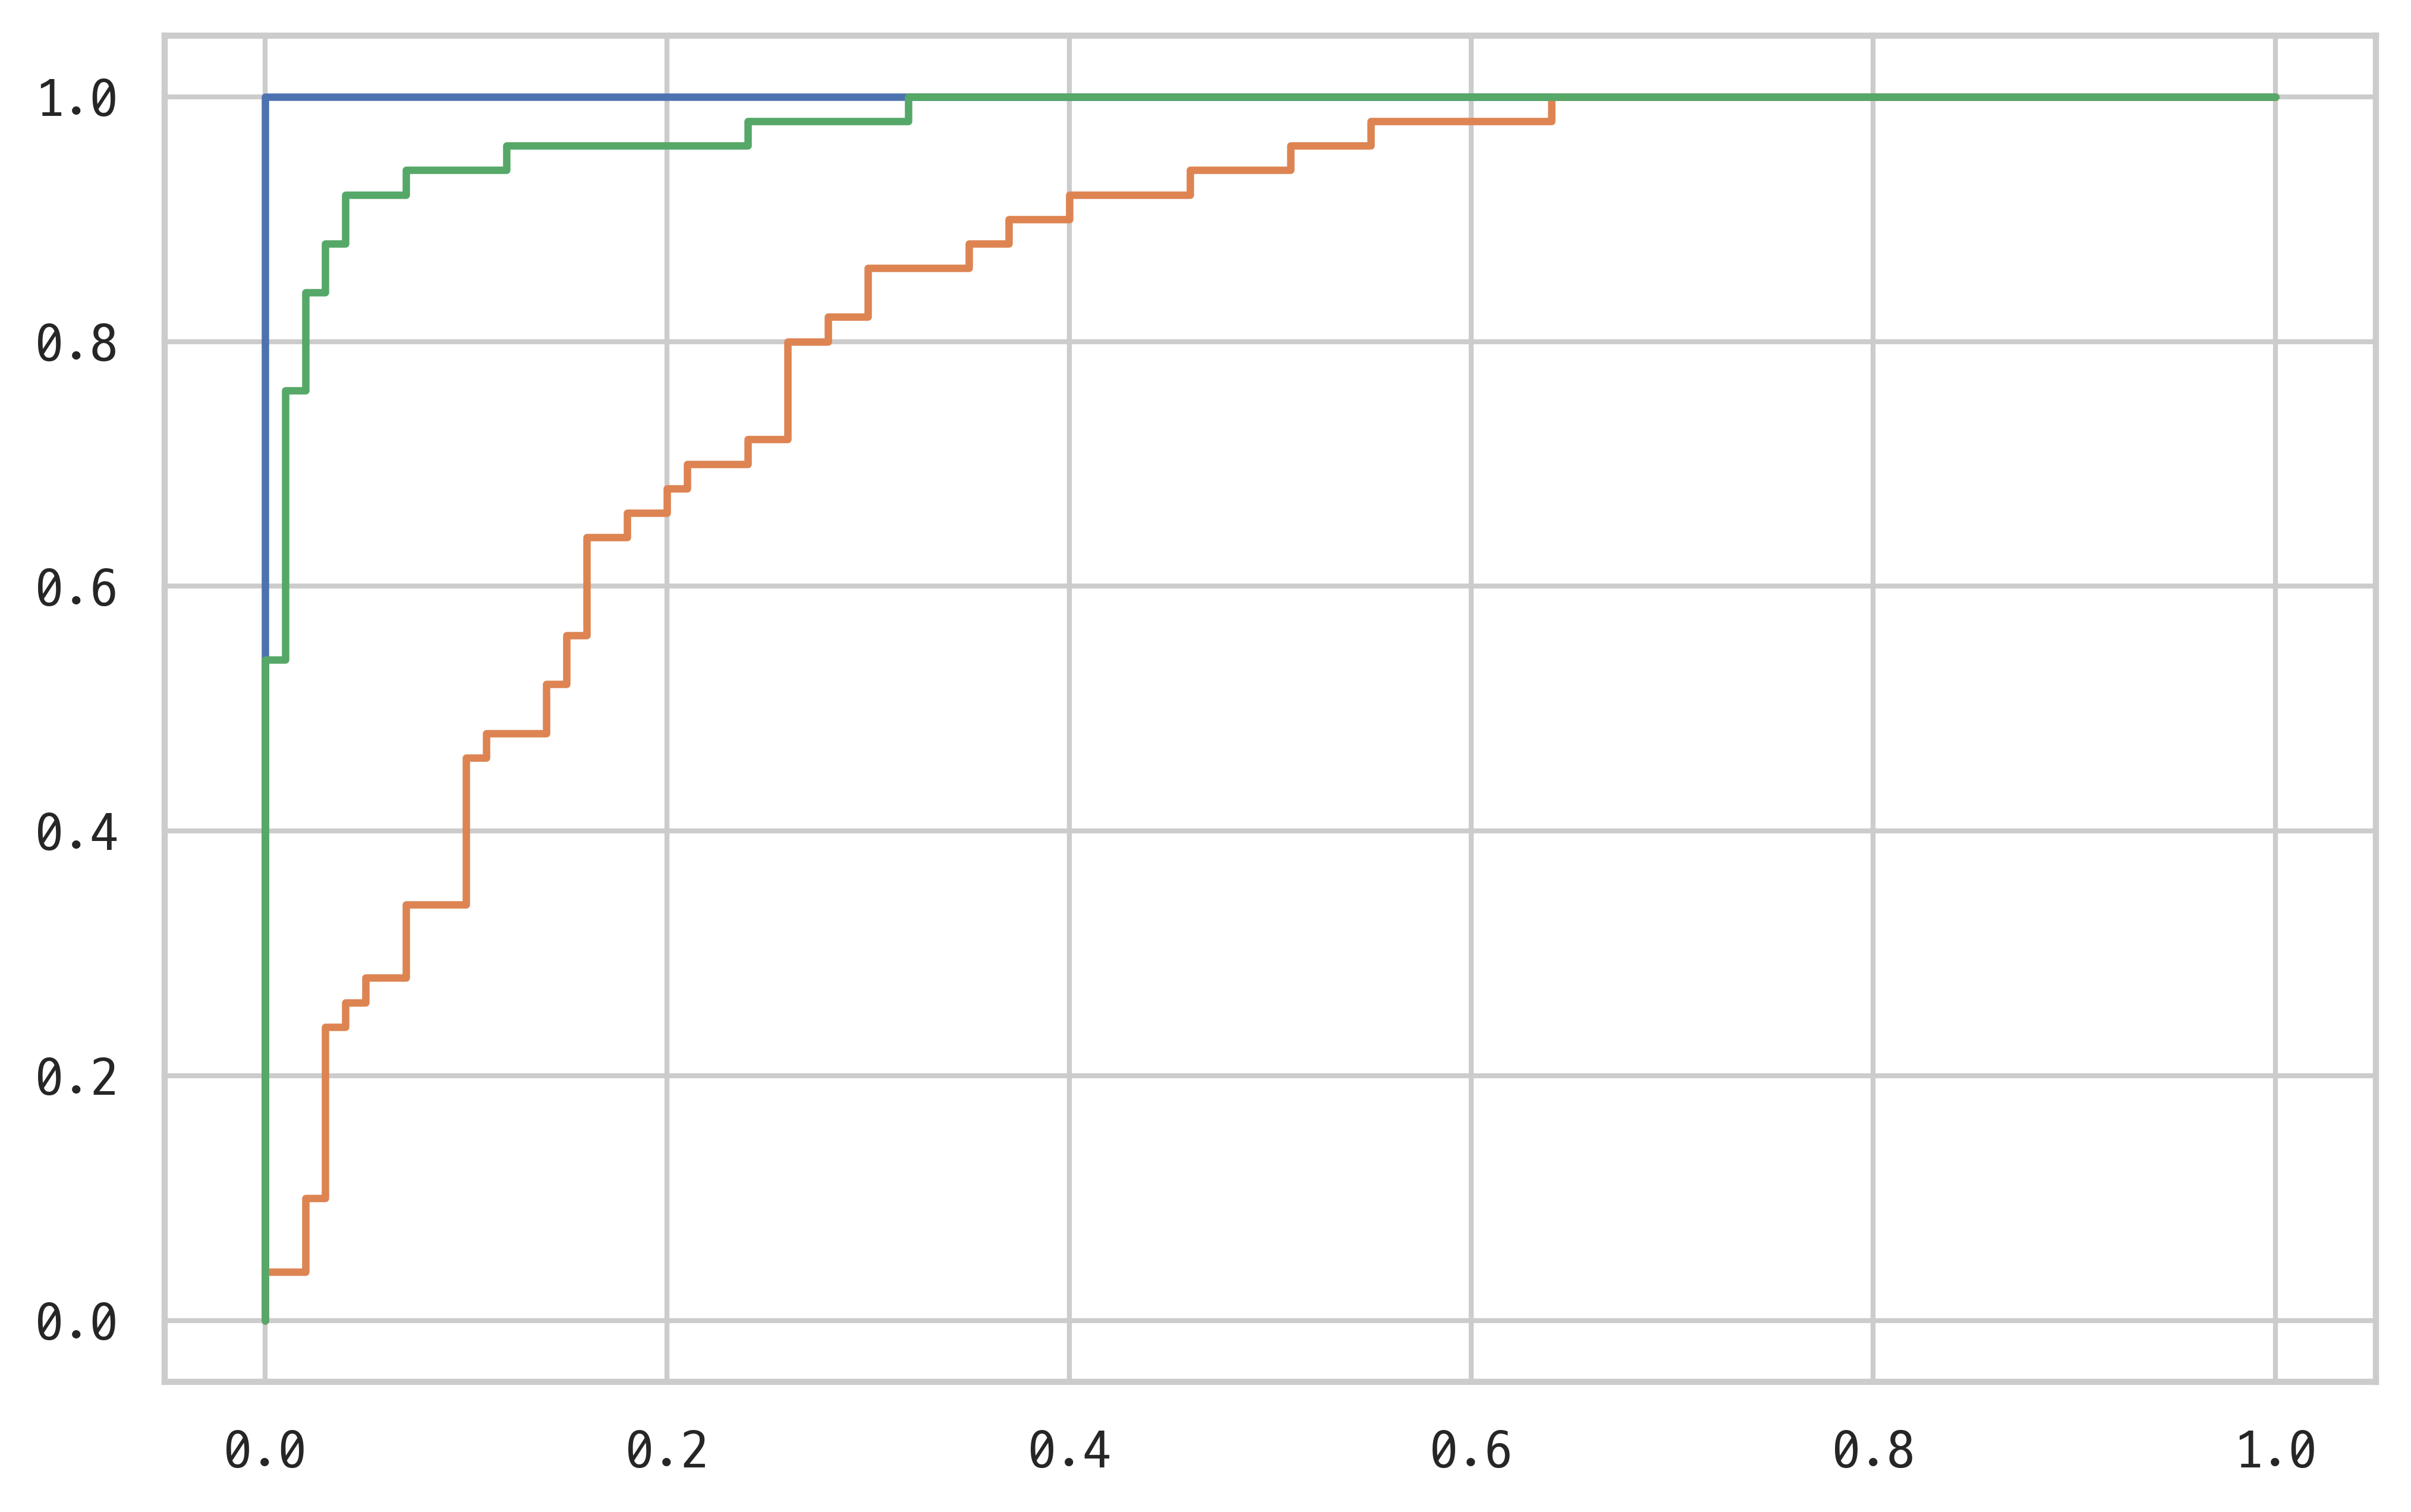

In [70]:
from sklearn.preprocessing import label_binarize
# label_binarize = one-hot encoding

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()